In [ ]:
pip install pandas numpy scikit-learn matplotlib

In [ ]:
pip list pandas 

In [1]:
import pandas as pd
data = pd.read_csv("D:/5059/TrainingDatas/Handbooks/ML/telecom_data.csv")
data.head(10)

,Age,Gender,PlanType,MonthlyUsage,Churn
0,21,Female,Regular,15,No
1,45,Female,Economy,41,No
2,44,Female,Economy,40,No
3,31,Female,Regular,23,Yes
4,33,Female,Regular,12,No
5,42,Female,Regular,52,No
6,20,Female,Ultra,57,Yes
7,26,Male,Ultra,23,No
8,37,Female,Advanced,31,No
9,26,Male,Economy,23,No


In [2]:
print("Column Names:")
print(data.columns.tolist())
print("\nData shape: ", data.shape)
print("\nSummary of data:")
print(data.info())
print("\n Statistics of data")
print(data.describe())
print("\nChecking for null values:")
print(data.isnull().sum())
print("\nDataset consistency: ")
print(data.dtypes)

Column Names:
['Age', 'Gender', 'PlanType', 'MonthlyUsage', 'Churn']

Data shape:  (150, 5)

Summary of data:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Age           150 non-null    int64 
 1   Gender        150 non-null    object
 2   PlanType      150 non-null    object
 3   MonthlyUsage  150 non-null    int64 
 4   Churn         150 non-null    object
dtypes: int64(2), object(3)
memory usage: 6.0+ KB
None

 Statistics of data
              Age  MonthlyUsage
count  150.000000    150.000000
mean    35.193333     33.693333
std     10.841566     15.923031
min     19.000000      3.000000
25%     25.000000     23.000000
50%     35.000000     35.000000
75%     44.000000     50.000000
max     54.000000     59.000000

Checking for null values:
Age             0
Gender          0
PlanType        0
MonthlyUsage    0
Churn           0
dtype: int6

In [3]:
print("Dataset Bias")
print(data['Gender'].value_counts(normalize=True))
print(data['Churn'].value_counts(normalize=True))


Dataset Bias
Gender
Female    0.793333
Male      0.206667
Name: proportion, dtype: float64
Churn
No     0.893333
Yes    0.106667
Name: proportion, dtype: float64


<Axes: >

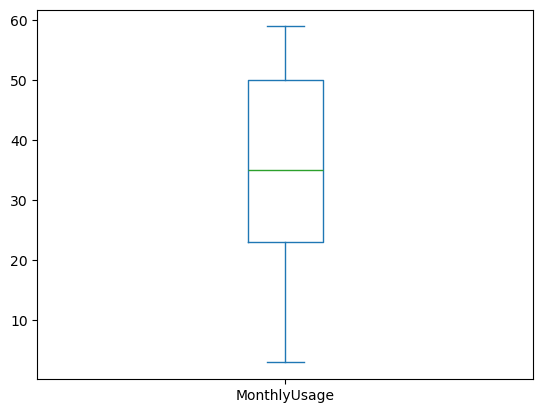

In [4]:
data['MonthlyUsage'].plot(kind='box')

# Dataset Specification Sheet

## Dataset Overview

| Field | Details |
|------|--------|
| **Dataset Name** | customer_churn_usage.csv (demo dataset) |
| **Description** | Contains 150 customer records with demographic information, subscription plan types, monthly usage, and churn status. Useful for demonstrating Data Quality checks (completeness, consistency), descriptive statistics, and bias/distribution analysis for churn-related studies. |
| **Features** | Age (int64), Gender (object), PlanType (object), MonthlyUsage (int64), Churn (object) |
| **Target Variable** | Churn (Yes / No) |
| **Number of Rows** | 150 |
| **Null Handling** | No missing values in the dataset |
| **Owner** | Student / Notebook Author |
| **Last Updated** | 2026-01-07 |

---

## Data Structure & Quality Checks

- **Column Names**  
  ```python
  ['Age', 'Gender', 'PlanType', 'MonthlyUsage', 'Churn']


In [5]:
fdata = data.drop(columns=['Churn'])
X = fdata

y = data["Churn"].map({'Yes':1,'No':0})

categorical = fdata.select_dtypes(include='object').columns
numerical = fdata.select_dtypes(exclude='object').columns

print("Categorical Features:", list(categorical))
print("Numerical Features: ",list(numerical))

Categorical Features: ['Gender', 'PlanType']
Numerical Features:  ['Age', 'MonthlyUsage']


### Feature tansformation and Representation

In [6]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler

X_encoded_gd = pd.get_dummies(
    X,
    columns = categorical,
    drop_first=True
)

print("gd_encoded Columns: ", X_encoded_gd.columns.tolist())

gd_encoded Columns:  ['Age', 'MonthlyUsage', 'Gender_Male', 'PlanType_Economy', 'PlanType_Regular', 'PlanType_Standard', 'PlanType_Ultra']


In [7]:
print(X_encoded_gd.Gender_Male)

0      False
1      False
2      False
3      False
4      False
       ...  
145    False
146    False
147    False
148    False
149    False
Name: Gender_Male, Length: 150, dtype: bool


In [8]:
print(X_encoded_gd.PlanType_Regular.describe())

count       150
unique        2
top       False
freq        118
Name: PlanType_Regular, dtype: object


In [9]:
ohe = OneHotEncoder(
    drop='first',
    sparse_output=False
)

encoded_array =ohe.fit_transform(X[categorical])

encoded_df = pd.DataFrame(
    encoded_array,
    columns=ohe.get_feature_names_out(categorical)
)

print(encoded_array) #prints encoded gender (1 if male) and 1 for plan types -Economy, Regular, Standard, Ultra

[[0. 0. 1. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0.]
 [1. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0.]
 [1. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 [1. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1.]
 [1. 0. 1. 0. 0.]
 [1. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1.]
 [0. 0. 0. 1. 0.]
 [1. 1. 0. 0. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 1. 0. 0.]
 [1. 0. 0. 0. 1.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0.]
 [1. 0. 0. 1. 0.]
 [0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [1. 0. 0.

In [10]:
print(encoded_df)

     Gender_Male  PlanType_Economy  PlanType_Regular  PlanType_Standard  \
0            0.0               0.0               1.0                0.0   
1            0.0               1.0               0.0                0.0   
2            0.0               1.0               0.0                0.0   
3            0.0               0.0               1.0                0.0   
4            0.0               0.0               1.0                0.0   
..           ...               ...               ...                ...   
145          0.0               0.0               0.0                0.0   
146          0.0               0.0               0.0                0.0   
147          0.0               0.0               0.0                0.0   
148          0.0               1.0               0.0                0.0   
149          0.0               0.0               0.0                1.0   

     PlanType_Ultra  
0               0.0  
1               0.0  
2               0.0  
3          

In [11]:
x_encoded_ohe=pd.concat(
    [X[numerical].reset_index(drop=True), encoded_df.reset_index(drop=True)],
    axis=1
)

print("OHE encoded columns: ", x_encoded_ohe.columns.tolist()) #categorical values are encoded rest as it is

OHE encoded columns:  ['Age', 'MonthlyUsage', 'Gender_Male', 'PlanType_Economy', 'PlanType_Regular', 'PlanType_Standard', 'PlanType_Ultra']


In [12]:
scaler = StandardScaler()

x_scaled_gd = X_encoded_gd.copy()
x_scaled_gd[numerical] = scaler.fit_transform(x_scaled_gd[numerical])

x_scaled_ohe = x_encoded_ohe.copy()
x_scaled_ohe[numerical] = scaler.fit_transform(x_scaled_ohe[numerical])

df=pd.DataFrame({
    'Age_ohe':x_scaled_ohe[numerical]['Age'], #age scaled by ohe 
    'Age_gd':x_scaled_gd[numerical]['Age'], #age scaled by gd
    'MonthlyUsage_ohe':x_scaled_ohe[numerical]['MonthlyUsage'],
    'MonthlyUsage_gd':x_scaled_gd[numerical]['MonthlyUsage']
})

print(df)

      Age_ohe    Age_gd  MonthlyUsage_ohe  MonthlyUsage_gd
0   -1.313545 -1.313545         -1.177914        -1.177914
1    0.907574  0.907574          0.460411         0.460411
2    0.815027  0.815027          0.397399         0.397399
3   -0.388079 -0.388079         -0.673814        -0.673814
4   -0.202986 -0.202986         -1.366951        -1.366951
..        ...       ...               ...              ...
145 -1.498638 -1.498638         -1.934064        -1.934064
146  0.629934  0.629934          1.153549         1.153549
147  1.740493  1.740493         -1.682014        -1.682014
148 -1.406091 -1.406091          1.468612         1.468612
149 -0.388079 -0.388079         -0.673814        -0.673814

[150 rows x 4 columns]


## Split the Data

In [ ]:
from sklearn.model_selection import train_test_split

#Split the data into training set (80%) and test set (20%)
X_train, X_tes, y_train, y_test = train_test_split(
    x_scaled_ohe,           #Preprocessed feature matrix
    y,                      #Target variable(churn)
    test_size=0.20,         #20% hold-out test data
    random_state=42,        #Reproducibility ie. to preserve the split as same everytime it runs
    stratify=y      #Preserve churn distribution ie. all churners should not move into only training or only testing data
)

#verify class distrubution
pd.DataFrame({
    "Train": y_train.value_counts(normalize=True),
    "Test": y_test.value_counts(normalize=True)
})



,Train,Test
Churn,,
0,0.891667,0.9
1,0.108333,0.1
